# Exercício BDTD

## Exercício:

- Fazer uma pesquisa no site da BDTD sobre o tema “biblioteconomia”;
- Baixar o resultado em CSV;
- Fazer a carga dos dados em um dataframe do Pandas e analisar os seguintes pontos:
- gráfico de distribuição de instituições X documentos publicados
- gráfico de distribuição temporal de documentos X ano
- gráfico de distribuição de formatos de documentos X números de documentos
- uma tabela dos 20 orientadores “advisors” mais influentes

## Carregamento dos dados

In [1]:
# Importação convencional das bibliotecas

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

#permitir visualizar todas as colunas
pd.options.display.max_columns = None

#renderizar os gráficos diretamente no notebook
#%matplotlib inline

In [2]:
# Carregamento dos dados

biblio = pd.read_csv('bibliobdtd.csv', sep=';')

In [3]:
# Mostrar as 5 primeiras linhas

biblio.head()

,id,title,abstract_por,authors,contributors,subjectsCNPQ,subjectsPOR,institutions,departements,programs,types,accesslevel,publicationDates,urls,formats,languages,Unnamed: 16
0,PUC_SP-1_646cc3010615e7f63d02ae06a49878ce,Epistemologia da Biblioteconomia,Em 1981 apontei num breve artigo que entitulei...,"primary[Mostafa, Solange Puntel(http://buscate...","advisor[Cesar, Constanca Marcondes(NA)]",CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,Epistemologia|Ciência da informação|Filosofia ...,PUC_SP,Educação,Programa de Estudos Pós-Graduados em Educação:...,doctoralThesis,openAccess,1985,https://tede2.pucsp.br/handle/handle/10705,doctoralThesis,por,NaN
1,UFMG_b863e34626b3175aee16422528984cd0,Biblioteconomia contemporânea: desafios e real...,Esta pesquisa foi realizada com o objetivo de ...,primary[Emanuelle Georgia Amaral Ferreira(NA)],advisor[Carlos Alberto Avila Araujo(NA)]|refer...,NaN,Nova Biblioteconomia|Biblioteca|Biblioteconomi...,UFMG,NaN,NaN,masterThesis,openAccess,2016,http://hdl.handle.net/1843/BUOS-AV2HH8,masterThesis,por,NaN
2,UFSC_cca4e2ff56abbbe594044faf2aee572a,O gênero na Biblioteconomia : percepção de bib...,Esta tese teve como objetivo investigar o gêne...,"primary[Sousa, Beatriz Alves de(NA)]","advisor[Pedro, Joana Maria(NA)]|coadvisor[Cunh...",NaN,NaN,UFSC,NaN,NaN,doctoralThesis,openAccess,2014,https://repositorio.ufsc.br/xmlui/handle/12345...,doctoralThesis,por,NaN
3,UNB_f1d4b45d940b27b572fb71c88e4ca2b8,Problemática da realização de pesquisa pelos p...,Pesquisa exploratória dos elementos individuai...,"primary[Barretto, Clara Maria Weber(NA)]","advisor[Figueiredo, Nice Menezes de(NA)]",NaN,NaN,UNB,NaN,NaN,masterThesis,openAccess,1981,http://repositorio.unb.br/handle/10482/35267,masterThesis,por,NaN
4,UFC-7_ff534a7cfa8d99e4d16b8f5c13e5ec0f,Diagnóstico da acessibilidade informacional na...,"The hugh advance in science and technology, th...","primary[Fernandes, Joana D'Arc Páscoa Bezerra(...","advisor[Souza, Osvaldo de(NA)]",NaN,Biblioteconomia brasileira|Acessibilidade info...,UFC,NaN,NaN,masterThesis,openAccess,2018,http://www.repositorio.ufc.br/handle/riufc/33425,masterThesis,por,NaN


## Dicionário dos Dados

- <b>id</b>  = id do documento no site.
- <b>title</b> = Título do artigo
- <b>abstract_por</b> = Resumo do Artigo
- <b>authors</b> = Autores.
- <b>contributors</b> = Contribuidores.
- <b>subjectsCNPQ</b> = Assuntos (na CNPQ?)
- <b>subjectsPOR</b> = Assuntos.
- <b>institutions</b> = Universidade na qual o documento foi produzido.
- <b>departements</b> = Departamento ao qual a tese/dissertação está vinculado.
- <b>programs</b> = Programa ao qual a tese/dissertação está vinculado.
- <b>types</b> = Tipo do documento (se é tese/dissertação de mestrado, doutorado etc.)
- <b>accesslevel</b> = Tipo de acesso do documento (se é aberto ou tem restrições)
- <b>publicationDates</b> = Data de Publicação (ano).
- <b>urls</b> = Endereço web do documento. 
- <b>formats</b> = Estilo do documento (se é tese/dissertação de mestrado, doutorado etc.)
- <b>languages</b> = Idiomas usados na tese/dissertação.
- <b>Unnamed: 16</b> = Coluna erro, pois não tem nenhum valor.

## Limpeza dos Dados

In [4]:
# Conferir a quantidade de céluas vazias

biblio.isnull().sum()

id                     0
title                  0
abstract_por          97
authors                0
contributors          23
subjectsCNPQ         862
subjectsPOR          203
institutions           0
departements         904
programs             828
types                  0
accesslevel            0
publicationDates       0
urls                   0
formats                0
languages              7
Unnamed: 16         1000
dtype: int64

In [5]:
# Calcula o total de células no DataFrame
totalCelulas = np.product(biblio.shape)

# Conta o número de valores faltantes por coluna
faltanteCount = biblio.isnull().sum()

# Calcula o número total de valores faltantes
totalFaltante = faltanteCount.sum()

# Calcula a porcentagem de valores faltantes
print("A Base de dados contém", round(((totalFaltante/totalCelulas) * 100), 2), "%", "de valores faltantes.")

A Base de dados contém 23.08 % de valores faltantes.


In [6]:
# Visualizar os tipos dos dados
biblio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   title             1000 non-null   object 
 2   abstract_por      903 non-null    object 
 3   authors           1000 non-null   object 
 4   contributors      977 non-null    object 
 5   subjectsCNPQ      138 non-null    object 
 6   subjectsPOR       797 non-null    object 
 7   institutions      1000 non-null   object 
 8   departements      96 non-null     object 
 9   programs          172 non-null    object 
 10  types             1000 non-null   object 
 11  accesslevel       1000 non-null   object 
 12  publicationDates  1000 non-null   int64  
 13  urls              1000 non-null   object 
 14  formats           1000 non-null   object 
 15  languages         993 non-null    object 
 16  Unnamed: 16       0 non-null      float64
d

In [7]:
# Eliminar colunas desnecessárias para o presente exerício
biblio.drop(['Unnamed: 16', 'languages', 'urls', 'accesslevel', 'programs',
            'departements', 'subjectsPOR', 'subjectsCNPQ', 'abstract_por', 'id', 'types', 'title'], axis = 1, inplace = True)

In [8]:
# Renomear colunas
biblio.columns = ['Autores', 'Orientadores', 'Instituições', 'DataPublicação', 'Formato']

In [9]:
# Ver como ficou com as colunas renomeadas
biblio.head()

,Autores,Orientadores,Instituições,DataPublicação,Formato
0,"primary[Mostafa, Solange Puntel(http://buscate...","advisor[Cesar, Constanca Marcondes(NA)]",PUC_SP,1985,doctoralThesis
1,primary[Emanuelle Georgia Amaral Ferreira(NA)],advisor[Carlos Alberto Avila Araujo(NA)]|refer...,UFMG,2016,masterThesis
2,"primary[Sousa, Beatriz Alves de(NA)]","advisor[Pedro, Joana Maria(NA)]|coadvisor[Cunh...",UFSC,2014,doctoralThesis
3,"primary[Barretto, Clara Maria Weber(NA)]","advisor[Figueiredo, Nice Menezes de(NA)]",UNB,1981,masterThesis
4,"primary[Fernandes, Joana D'Arc Páscoa Bezerra(...","advisor[Souza, Osvaldo de(NA)]",UFC,2018,masterThesis


### Removendo o que há antes e depois do nome do autor e do orientador

Os dados são precedidos ou por 'primary' ou por 'advisor'. São também sucedidos por '(NA)'. São informações que estão ali, provavelmente, por erro.

In [10]:
# Tirar a palavra "primary" na coluna Autores
biblio['Autores'] = biblio['Autores'].str.replace('primary\[','')

In [11]:
# Tirar tudo que vem depois de 'NA' na coluna Autores, com uma função lambda
biblio['Autores'] = biblio['Autores'].apply(lambda x: x.split('(NA)')[0])

In [12]:
#Apagar o colchete restante
biblio['Autores'] = biblio['Autores'].str.replace('\[','')

In [13]:
biblio.head()

,Autores,Orientadores,Instituições,DataPublicação,Formato
0,"Mostafa, Solange Puntel(http://buscatextual.cn...","advisor[Cesar, Constanca Marcondes(NA)]",PUC_SP,1985,doctoralThesis
1,Emanuelle Georgia Amaral Ferreira,advisor[Carlos Alberto Avila Araujo(NA)]|refer...,UFMG,2016,masterThesis
2,"Sousa, Beatriz Alves de","advisor[Pedro, Joana Maria(NA)]|coadvisor[Cunh...",UFSC,2014,doctoralThesis
3,"Barretto, Clara Maria Weber","advisor[Figueiredo, Nice Menezes de(NA)]",UNB,1981,masterThesis
4,"Fernandes, Joana D'Arc Páscoa Bezerra","advisor[Souza, Osvaldo de(NA)]",UFC,2018,masterThesis


In [14]:
# Retirar link de sites, se houve
biblio['Autores'] = biblio['Autores'].apply(lambda x: x.split('(http')[0])

In [15]:
#Resultado da coluna Autores
biblio.head()

,Autores,Orientadores,Instituições,DataPublicação,Formato
0,"Mostafa, Solange Puntel","advisor[Cesar, Constanca Marcondes(NA)]",PUC_SP,1985,doctoralThesis
1,Emanuelle Georgia Amaral Ferreira,advisor[Carlos Alberto Avila Araujo(NA)]|refer...,UFMG,2016,masterThesis
2,"Sousa, Beatriz Alves de","advisor[Pedro, Joana Maria(NA)]|coadvisor[Cunh...",UFSC,2014,doctoralThesis
3,"Barretto, Clara Maria Weber","advisor[Figueiredo, Nice Menezes de(NA)]",UNB,1981,masterThesis
4,"Fernandes, Joana D'Arc Páscoa Bezerra","advisor[Souza, Osvaldo de(NA)]",UFC,2018,masterThesis


In [16]:
#tirar a palavra "advisor" na coluna Orientadores
biblio['Orientadores'] = biblio['Orientadores'].str.replace('advisor\[','')

In [17]:
# tirar o colchete restante
biblio['Orientadores'] = biblio['Orientadores'].str.replace('\[','')

In [18]:
#Tirar o que vem depois de '(NA)' com o método partition
biblio['Orientadores'] = biblio['Orientadores'].str.partition('(NA)')

In [19]:
#Ver o resultado
biblio.head()

,Autores,Orientadores,Instituições,DataPublicação,Formato
0,"Mostafa, Solange Puntel","Cesar, Constanca Marcondes",PUC_SP,1985,doctoralThesis
1,Emanuelle Georgia Amaral Ferreira,Carlos Alberto Avila Araujo,UFMG,2016,masterThesis
2,"Sousa, Beatriz Alves de","Pedro, Joana Maria",UFSC,2014,doctoralThesis
3,"Barretto, Clara Maria Weber","Figueiredo, Nice Menezes de",UNB,1981,masterThesis
4,"Fernandes, Joana D'Arc Páscoa Bezerra","Souza, Osvaldo de",UFC,2018,masterThesis


### Inverter a posição do nome e sobrenome

In [20]:
#Reverter nome e sobrenome da coluna Autores
biblio['Autores'] = biblio['Autores'].str.split(', ').str[::-1].str.join(' ')

In [21]:
#Reverter nome e sobrenome da coluna Orientadores

biblio['Orientadores'] = biblio['Orientadores'].str.split(', ').str[::-1].str.join(' ')

In [22]:
biblio['Formato'] = biblio['Formato'].str.replace('doctoralThesis','Tese de Doutorado')

In [23]:
biblio['Formato'] = biblio['Formato'].str.replace('masterThesis','Tese de Mestrado')

In [24]:
#Ver o resultado
biblio.head()

,Autores,Orientadores,Instituições,DataPublicação,Formato
0,Solange Puntel Mostafa,Constanca Marcondes Cesar,PUC_SP,1985,Tese de Doutorado
1,Emanuelle Georgia Amaral Ferreira,Carlos Alberto Avila Araujo,UFMG,2016,Tese de Mestrado
2,Beatriz Alves de Sousa,Joana Maria Pedro,UFSC,2014,Tese de Doutorado
3,Clara Maria Weber Barretto,Nice Menezes de Figueiredo,UNB,1981,Tese de Mestrado
4,Joana D'Arc Páscoa Bezerra Fernandes,Osvaldo de Souza,UFC,2018,Tese de Mestrado


### Gráfico de distribuição de instituições X Documentos publicados


In [25]:
# value_counts() para obter a quantidade de valores por instituição
biblio.Instituições.value_counts()

UFRGS         447
UFSC          127
UFMG           97
UNB            49
UNESP          41
UFSCAR         34
UFBA           24
USP            22
UFPB           18
IBICT          17
UFC            13
UFTM           12
UFF            11
PUC_CAMP        7
UEL             6
FIOCRUZ         6
UFV             5
UFPA            5
PUC_SP          4
UFSM            4
METODISTA       4
UFRN            4
UNICAMP         4
UFRRJ           3
UFES            3
UFS             3
UNILASALLE      2
UFJF            2
FURG            2
MB              2
UFG             2
UFPE            2
IEN             1
UFAL            1
CPRM            1
PUC_GO          1
UNIFESP         1
UFMA            1
UFGD            1
MACKENZIE       1
UCPEL           1
UCB             1
INPA            1
UFAM            1
ITA             1
UNISINOS        1
UNIPAMPA        1
UFVJM           1
UCS             1
UNINTER         1
Name: Instituições, dtype: int64

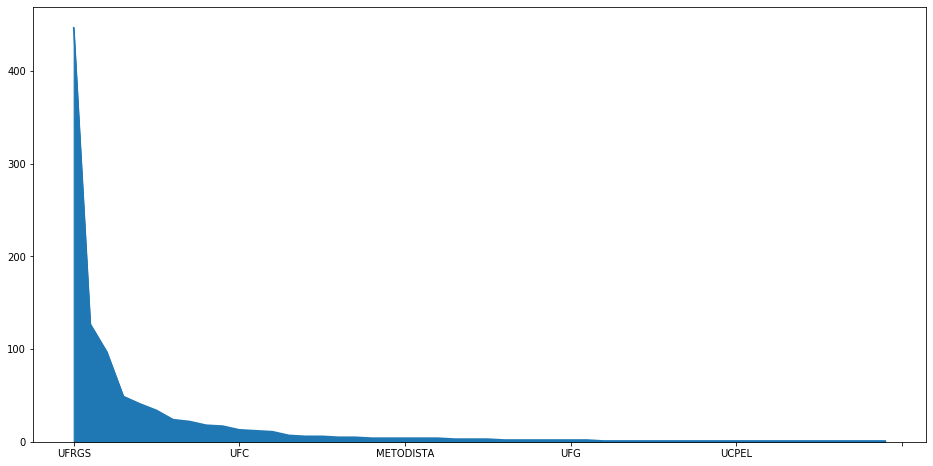

In [26]:
#grafico tipo área usando o plot.area()
biblio.Instituições.value_counts().plot.area(figsize = (16,8));

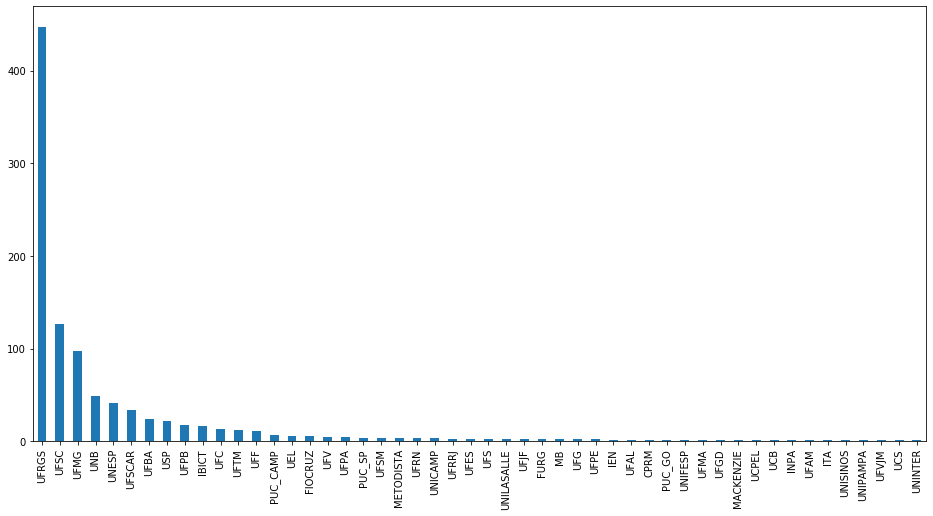

In [27]:
#grafico tipo barra usando o plot.bar()

biblio.Instituições.value_counts().plot.bar(figsize = (16,8));

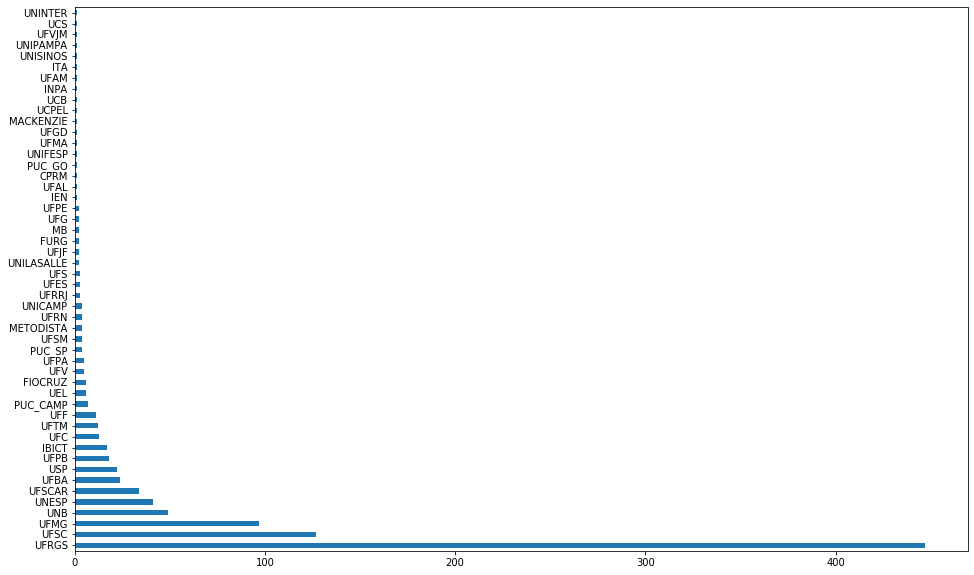

In [28]:
#grafico tipo barra horizontal usando o plot.barh()

biblio.Instituições.value_counts().plot.barh(figsize = (16,10));

### Gráfico de distribuição temporal de documentos X Ano

In [29]:
# atribuir uma variável para armazena a contagem de documentos por ano

ano = biblio.DataPublicação.value_counts()
ano

2017    98
2018    91
2016    88
2015    79
2019    77
2014    76
2012    65
2013    50
2009    44
2011    40
2007    35
2010    29
2005    25
2008    24
2004    19
2006    16
2002    16
2001    16
2003    13
1992     9
1980     9
1991     7
1999     6
2000     6
1981     6
1985     5
1998     5
1983     4
1987     4
1990     4
2020     4
1993     3
1986     3
1994     3
1984     3
1995     3
1982     3
1996     3
1979     3
1989     2
1988     1
1997     1
1978     1
1972     1
Name: DataPublicação, dtype: int64

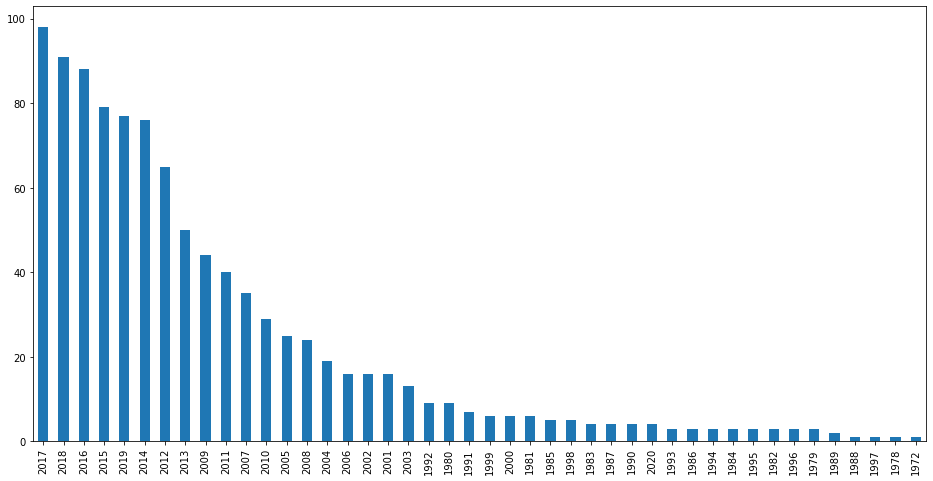

In [30]:
# plotando gráfico de barras com o método plot.par()

ano.plot.bar(figsize = (16,8));

### Gráfico de distribuição de formatos de documentos X números de documentos

In [31]:
# Contagem de cada valor dentro da variável

biblio.Formato.value_counts()

Tese de Mestrado     764
Tese de Doutorado    236
Name: Formato, dtype: int64

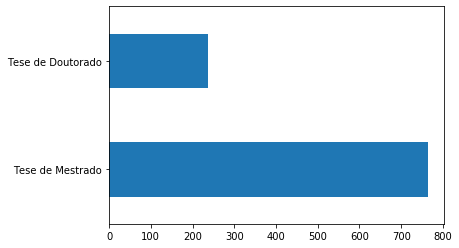

In [32]:
# Plotar gráfico horizontal com plot.barh()

biblio.Formato.value_counts().plot.barh();

### Tabela dos 20 orientadores “advisors” mais influentes

In [33]:
# Converter o vaulue_counts(), que é Série, para DataFrame e armazenar o resultado em uma variáve
top20 = biblio.Orientadores.value_counts().to_frame()

In [34]:
# Transformar o index em coluna

top20.reset_index(level=0, inplace=True)

In [35]:
# Renomear as colunas
top20.columns = ['Orientador', 'Trabalhos Orientados']

In [36]:
# Visualizar a tabela
top20.head(20)

,Orientador,Trabalhos Orientados
0,Maria Helena Weber,35
1,Alex Fernando Teixeira Primo,30
2,Valdir Jose Morigi,25
3,Márcia Benetti,24
4,Nilda Aparecida Jacks,24
5,Sonia Elisa Caregnato,23
6,Karla Maria Muller,23
7,Miriam de Souza Rossini,21
8,Ilza Maria Tourinho Girardi,20
9,Alexandre Rocha da Silva,19
